In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

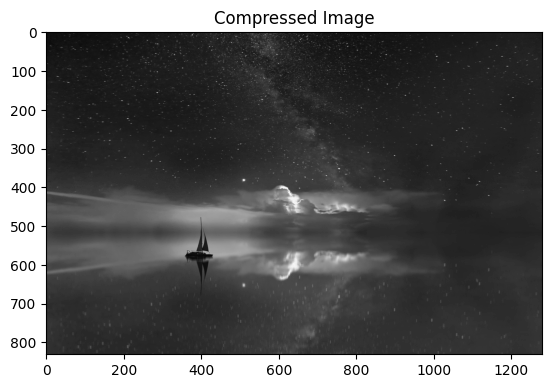

In [2]:

image = cv2.imread('/content/sample_data/ocean-3605547_1280.jpg', cv2.IMREAD_GRAYSCALE)

fourier_transform = np.fft.fft2(image)

threshold = 1000
filtered_fourier_transform = fourier_transform.copy()
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0

compressed_image = np.abs(np.fft.ifft2(filtered_fourier_transform))

plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()


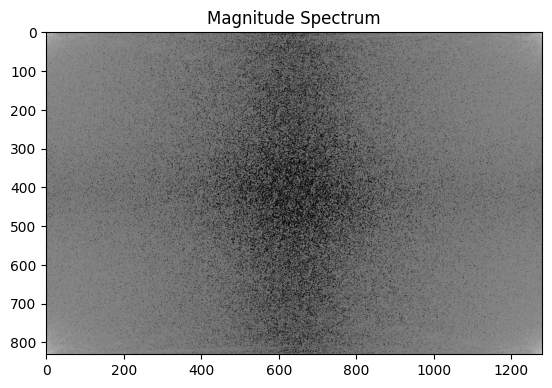

In [3]:
# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(filtered_fourier_transform) + 1)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


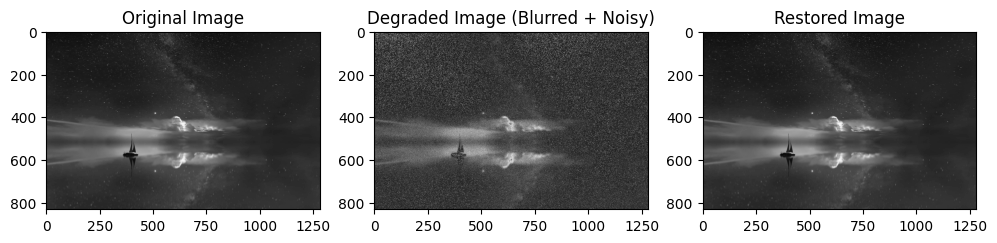

In [5]:

original_image = cv2.imread('/content/sample_data/ocean-3605547_1280.jpg', cv2.IMREAD_GRAYSCALE)

# Degrade the image
blur_kernel_size = (15, 15)
sigma = 2.0

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(original_image, blur_kernel_size, sigma)

# Add Gaussian noise
mean = 0
sigma = 25
noisy_image = blurred_image + np.random.normal(mean, sigma, blurred_image.shape).astype('uint8')

# Restore the degraded image (inverse filter)
epsilon = 1e-6
fourier_transform_original = np.fft.fft2(original_image)
fourier_transform_degraded = np.fft.fft2(noisy_image)
inverse_filter = np.divide(fourier_transform_original, fourier_transform_degraded + epsilon)
restored_image_frequency_domain = fourier_transform_degraded * inverse_filter
restored_image = np.abs(np.fft.ifft2(restored_image_frequency_domain))

# Display the original, degraded, and restored images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Degraded Image (Blurred + Noisy)')

plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')

plt.show()

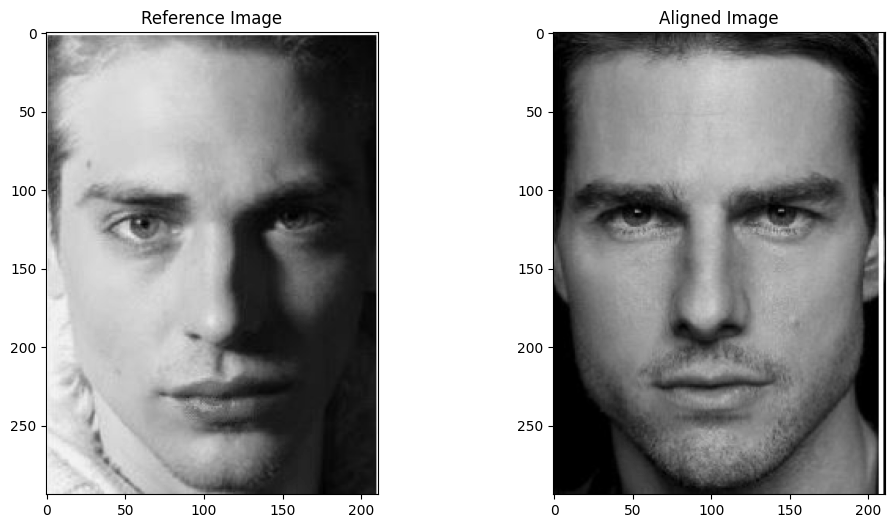

In [7]:


# Load the reference and target images (grayscale)
reference_image = cv2.imread('/content/sample_data/refrence.JPG', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('/content/sample_data/target.JPG', cv2.IMREAD_GRAYSCALE)

# Ensure both images have the same dimensions
if reference_image.shape != target_image.shape:
    target_image = cv2.resize(target_image, (reference_image.shape[1], reference_image.shape[0]))

# Perform the 2D Fourier Transform for both images
fourier_transform_reference = np.fft.fft2(reference_image)
fourier_transform_target = np.fft.fft2(target_image)

# Calculate the cross-power spectrum
cross_power_spectrum = fourier_transform_reference * np.conj(fourier_transform_target)

# Calculate phase correlation
phase_correlation = np.fft.ifft2(cross_power_spectrum / (np.abs(cross_power_spectrum) + 1e-6))

# Find the peak in the phase correlation to estimate translation
shifted_peak = np.unravel_index(np.argmax(np.abs(phase_correlation)), phase_correlation.shape)
x_shift, y_shift = shifted_peak[1], shifted_peak[0]

# Apply translation to align the images
aligned_image = np.roll(target_image, (y_shift, x_shift), axis=(0, 1))

# Display the reference and aligned images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 2, 2)
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')

plt.show()


**NON-LINEAR FILTERING (ALL 5 TASK)**

**Develop a median filter for removing salt-and-pepper noise from an image.**

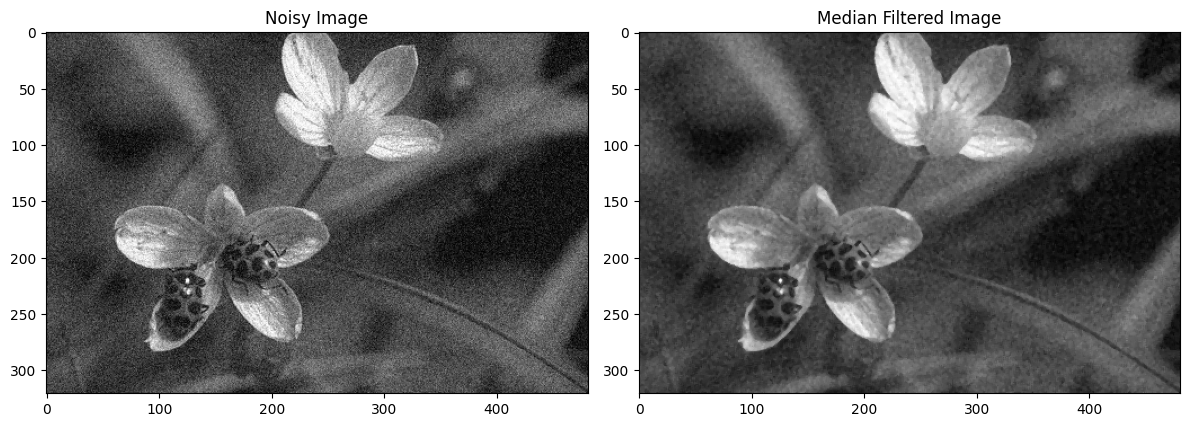

In [11]:
noisy_image = cv2.imread('/content/sample_data/flower_0.10_noisy.jpg', cv2.IMREAD_GRAYSCALE)

median_filtered = cv2.medianBlur(noisy_image, 3)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')

plt.tight_layout()
plt.show()

**Apply a max filter to perform dilation on a binary image.**

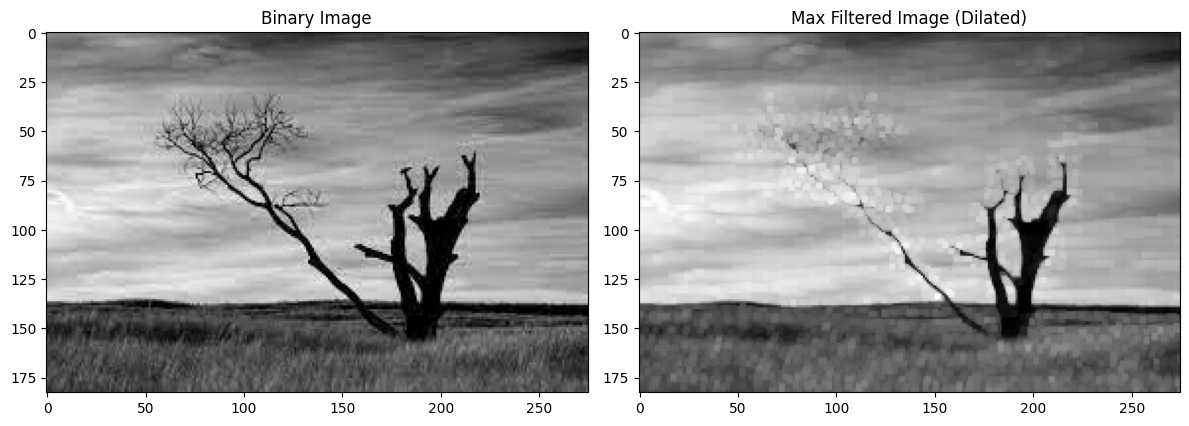

In [14]:
binary_image = cv2.imread('/content/sample_data/download.jfif', cv2.IMREAD_GRAYSCALE)


kernel_size = 3
max_filtered = cv2.dilate(binary_image, np.ones((kernel_size, kernel_size), np.uint8))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')


plt.subplot(1, 2, 2)
plt.imshow(max_filtered, cmap='gray')
plt.title('Max Filtered Image (Dilated)')

plt.tight_layout()
plt.show()



**Implement a min filter to perform erosion on a binary image.**

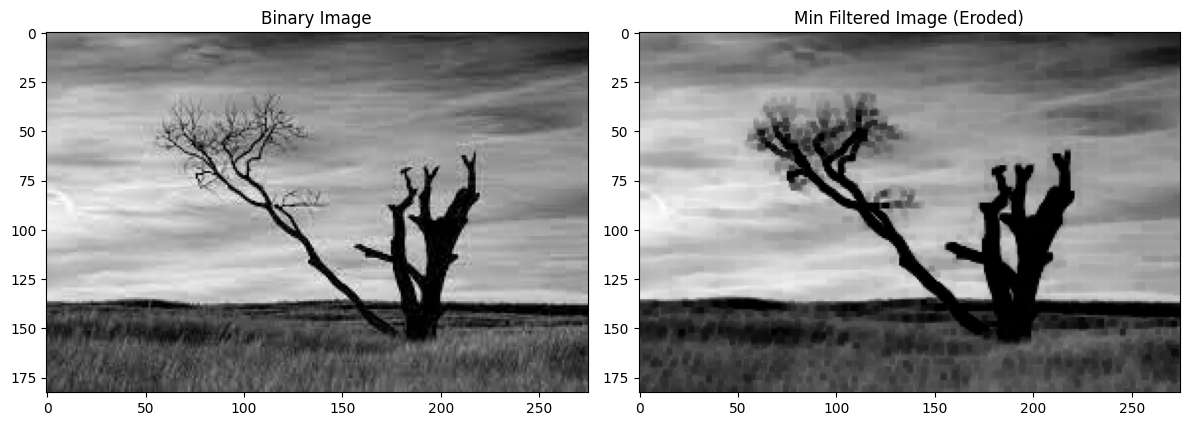

In [17]:
binary_image = cv2.imread('/content/sample_data/download.jfif', cv2.IMREAD_GRAYSCALE)


if binary_image is None:
    print("Error: Could not load the binary image.")
else:
    kernel_size = 3
    min_filtered = cv2.erode(binary_image, np.ones((kernel_size, kernel_size), np.uint8))

    if min_filtered is not None:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')

        plt.subplot(1, 2, 2)
        plt.imshow(min_filtered, cmap='gray')
        plt.title('Min Filtered Image (Eroded)')

        plt.tight_layout()
        plt.show()
    else:
        print("Error: Min filtered image is empty.")


**Create a bilateral filter for edge-preserving smoothing.**

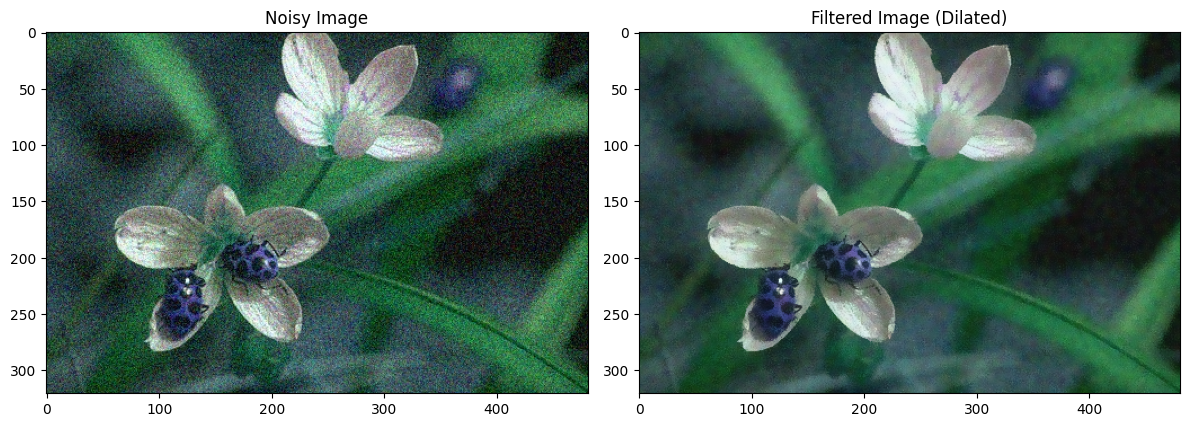

In [18]:
noisy_image = cv2.imread('/content/sample_data/flower_0.10_noisy.jpg')

filtered_image = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image , cmap='gray')
plt.title('Filtered Image (Dilated)')

plt.tight_layout()
plt.show()



**Implement an adaptive median filter for noise reduction while preserving edges.**

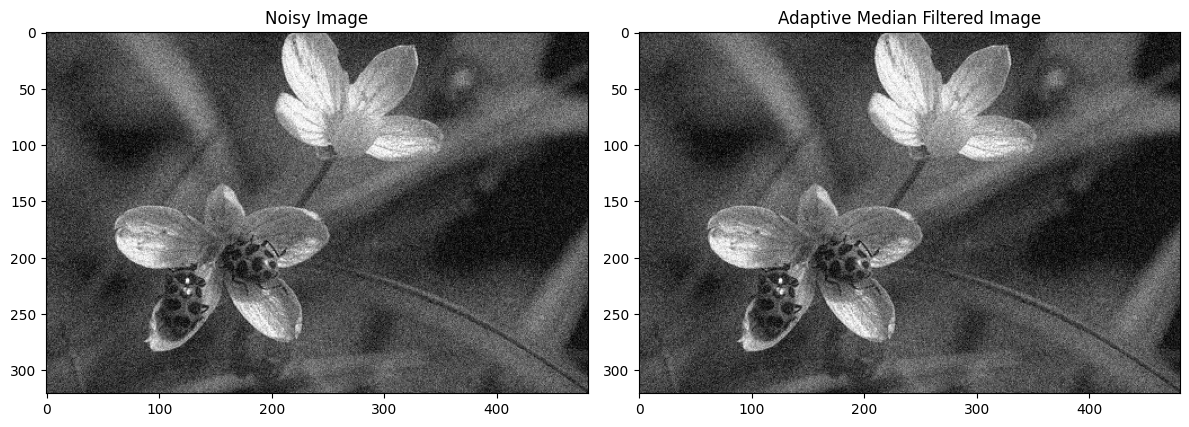

In [19]:
import cv2
import numpy as np

def adaptive_median_filter(image, kernel_size_max):
    result = np.copy(image)
    height, width = image.shape

    for y in range(height):
        for x in range(width):
            size = 3
            while size <= kernel_size_max:
                offset = size // 2
                neighborhood = image[max(0, y - offset):min(height, y + offset + 1), max(0, x - offset):min(width, x + offset + 1)]
                median = np.median(neighborhood)
                if image[y, x] == median:
                    result[y, x] = median
                    break
                size += 2

    return result

noisy_image = cv2.imread('/content/sample_data/flower_0.10_noisy.jpg', cv2.IMREAD_GRAYSCALE)

max_kernel_size = 7
filtered_image = adaptive_median_filter(noisy_image, max_kernel_size)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image , cmap='gray')
plt.title('Adaptive Median Filtered Image')

plt.tight_layout()
plt.show()





**Hybrid Images(ALL 5 TASK)**

**Create a hybrid image from two input images with different spatial frequencies.**

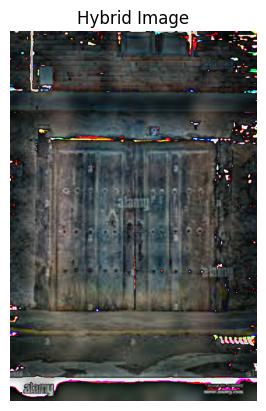

In [25]:

image1 = cv2.imread('/content/sample_data/p1.jpeg')
image2 = cv2.imread('/content/sample_data/p2.jfif')


sigma = 10
image1_blurred = cv2.GaussianBlur(image1, (0, 0), sigma)


image2_resized = cv2.resize(image2, (image1_blurred.shape[1], image1_blurred.shape[0]))


image2_blurred = cv2.GaussianBlur(image2_resized, (0, 0), sigma)


image2_highpass = image2_resized - image2_blurred


hybrid_image = image1_blurred + image2_highpass


plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title('Hybrid Image')
plt.axis('off')
plt.show()


**Experiment with different combinations of high-pass and low-pass filters for hybrid image creation.**

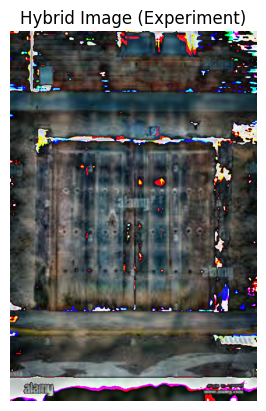

In [27]:
sigma_low = 5  # Low value for image1 (more detail)
sigma_high = 30  # High value for image2 (more structure)


image1_blurred = cv2.GaussianBlur(image1, (0, 0), sigma_low)


image2_resized = cv2.resize(image2, (image1_blurred.shape[1], image1_blurred.shape[0]))
image2_blurred = cv2.GaussianBlur(image2_resized, (0, 0), sigma_high)


image2_highpass = image2_resized - image2_blurred

hybrid_image = image1_blurred + image2_highpass


plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title('Hybrid Image (Experiment)')
plt.axis('off')
plt.show()


**Generate a hybrid image that exhibits a strong visual illusion when viewed from different distances.**

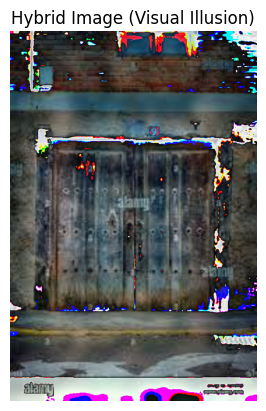

In [28]:

sigma_low = 10  # Low value for image1 (more detail)
sigma_high = 50  # High value for image2 (more structure)


image1_blurred = cv2.GaussianBlur(image1, (0, 0), sigma_low)


image2_resized = cv2.resize(image2, (image1_blurred.shape[1], image1_blurred.shape[0]))
image2_blurred = cv2.GaussianBlur(image2_resized, (0, 0), sigma_high)

image2_highpass = image2_resized - image2_blurred


hybrid_image = image1_blurred + image2_highpass


plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title('Hybrid Image (Visual Illusion)')
plt.axis('off')
plt.show()


**Investigate how changing the filter parameters affects the perception of a hybrid image.**

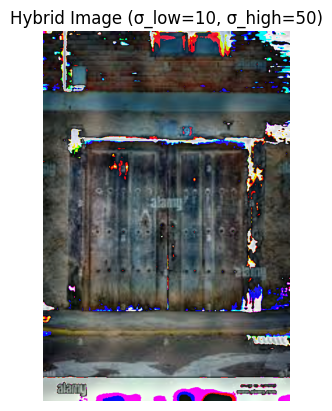

In [29]:

sigma_low = 10  # Low value for image1 (more detail)
sigma_high = 50  # High value for image2 (more structure)


image1_blurred = cv2.GaussianBlur(image1, (0, 0), sigma_low)

image2_resized = cv2.resize(image2, (image1_blurred.shape[1], image1_blurred.shape[0]))
image2_blurred = cv2.GaussianBlur(image2_resized, (0, 0), sigma_high)


image2_highpass = image2_resized - image2_blurred


hybrid_image = image1_blurred + image2_highpass


plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.title(f'Hybrid Image (σ_low={sigma_low}, σ_high={sigma_high})')
plt.axis('off')
plt.show()


**Analyze the trade-offs between high and low-frequency components in hybrid images for various
applications.**

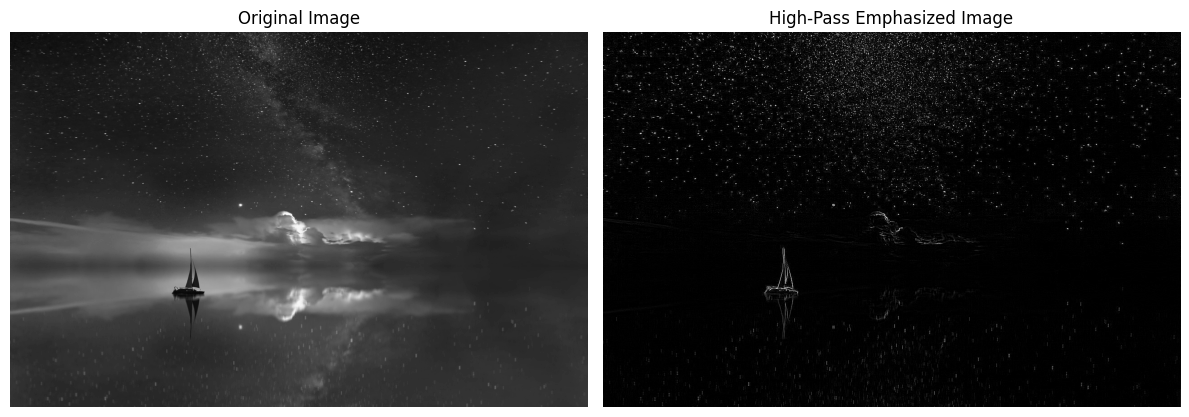

In [31]:
input_image = cv2.imread('/content/sample_data/ocean-3605547_1280.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

highpass_image = cv2.filter2D(input_image, -1, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highpass_image, cmap='gray')
plt.title('High-Pass Emphasized Image')
plt.axis('off')

plt.tight_layout()
plt.show()
